#### Prepare data for model

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import data

In [69]:
df_books = pd.read_csv('../data/books.csv')

## Drop columns Image-URL-S, Image-URL-M, Image-URL-L
df_books = df_books.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'])
df_books.head(2)

C:\Users\jantimko\AppData\Local\Temp\ipykernel_18664\2460274738.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_books = pd.read_csv('../data/books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [70]:
## Cast Year of publication as int, all other fields string

## For Year of Publication to numeric
df_books['Year-Of-Publication'] = pd.to_numeric(df_books['Year-Of-Publication'], errors='coerce')
df_books['Year-Of-Publication'] = df_books['Year-Of-Publication'].fillna(0)

df_books['Year-Of-Publication'] = df_books['Year-Of-Publication'].astype(int)

## Drop rows with NaN values
df_books = df_books.fillna(0)

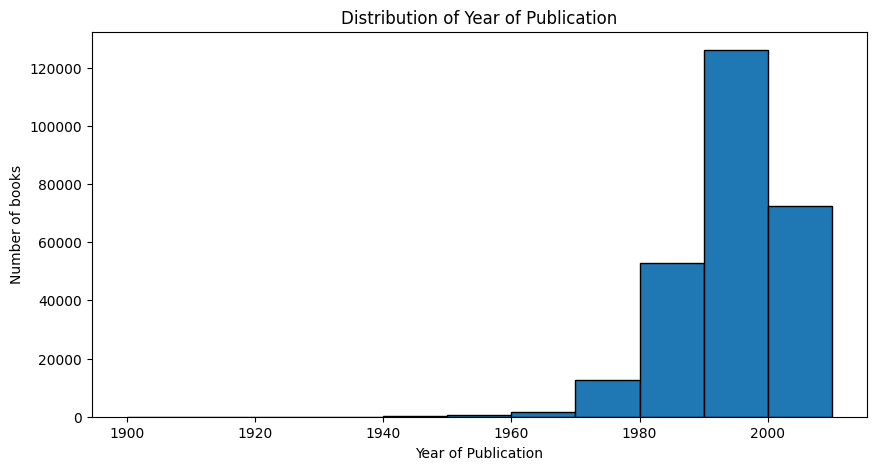

In [71]:
### Plot distribution of Year-Of-Publication
plt.figure(figsize=(10, 5))
plt.hist(df_books['Year-Of-Publication'], bins=range(1900, 2020, 10), edgecolor='black')
plt.xlabel('Year of Publication')
plt.ylabel('Number of books')
plt.title('Distribution of Year of Publication')
plt.show()

### Users data

In [72]:
df_users = pd.read_csv('../data/Users.csv')
df_users.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [73]:
df_split = df_users['Location'].str.split(', ', expand=True)

df_split = df_split.iloc[:,:3]

### Replace quotest and brackets with empty string
df_split = df_split.map(lambda x: x.replace('"', '').replace('(', '').replace(')', '') if isinstance(x, str) else x)
df_split = df_split.map(lambda x: x.replace('n/a', '').replace('-', '').replace(',', '') if isinstance(x, str) else x)

### Fill na and missing by NaN
df_split = df_split.fillna('')

try:
    df_users = df_users.drop(columns=['Location'])
except:
    pass


In [74]:
df_users[['City', 'Region/State', 'Country']] = df_split.copy()
df_users.head(5)

,User-ID,Age,City,Region/State,Country
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom


In [75]:
df_users['Age_Missing'] = df_users['Age'].isna().astype(int)
df_users['Age'].fillna(-1, inplace=True)  # Or use -1

C:\Users\jantimko\AppData\Local\Temp\ipykernel_18664\4045722479.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_users['Age'].fillna(-1, inplace=True)  # Or use -1


In [76]:
df_users.head(5)

,User-ID,Age,City,Region/State,Country,Age_Missing
0,1,-1.0,nyc,new york,usa,1
1,2,18.0,stockton,california,usa,0
2,3,-1.0,moscow,yukon territory,russia,1
3,4,17.0,porto,v.n.gaia,portugal,0
4,5,-1.0,farnborough,hants,united kingdom,1


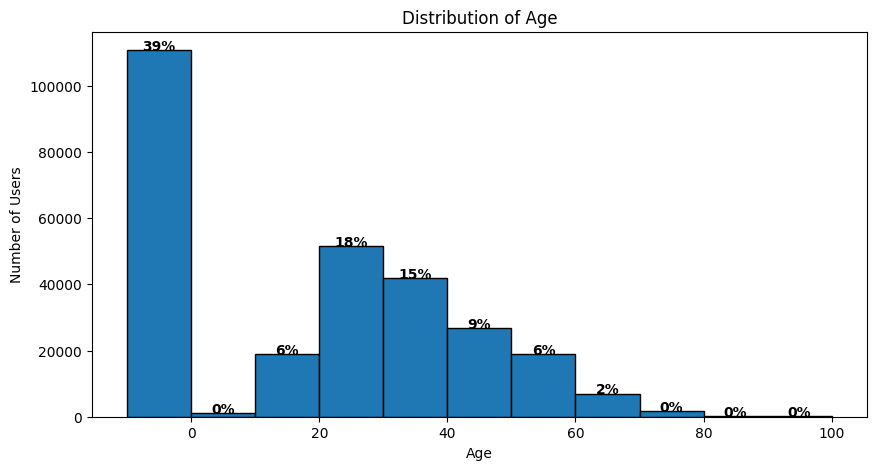

In [82]:

# Define bins
bins = range(-10, 110, 10)

# Plot histogram
plt.figure(figsize=(10, 5))
n, bins, patches = plt.hist(df_users['Age'].dropna(), bins=bins, edgecolor='black')

# Add percentage above bars
total_users = df_users['Age'].notna().sum()  # Exclude NaNs from total count
for patch, count in zip(patches, n):
    if count > 0:  # Avoid displaying text for empty bins
        plt.text(patch.get_x() + patch.get_width() / 2, count + 0.5, 
                 f"{int(count / total_users * 100)}%", 
                 ha='center', fontsize=10, fontweight='bold')

# Labels and title
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.title('Distribution of Age')
plt.show()


In [83]:
df_users

,User-ID,Age,City,Region/State,Country,Age_Missing
0,1,-1.0,nyc,new york,usa,1
1,2,18.0,stockton,california,usa,0
2,3,-1.0,moscow,yukon territory,russia,1
3,4,17.0,porto,v.n.gaia,portugal,0
4,5,-1.0,farnborough,hants,united kingdom,1
...,...,...,...,...,...,...
278853,278854,-1.0,portland,oregon,usa,1
278854,278855,50.0,tacoma,washington,united kingdom,0
278855,278856,-1.0,brampton,ontario,canada,1
278856,278857,-1.0,knoxville,tennessee,usa,1
